In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('train.csv')

In [5]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from scipy.linalg import lstsq
from numpy.linalg import pinv

In [25]:
X=df.drop(['yield', 'id', 'Row#'], axis=1)
# X=df[['AverageRainingDays','fruitset','fruitmass','seeds']]
# X['bumbles'].value_counts()
# X['bumbles_is_38']=X['bumbles']==0.38
# X['bumbles_is_25']=X['bumbles']==0.25
# X['clonesize_is_12.5']=X['clonesize']==12.5
# X['clonesize_is_25']=X['clonesize']==25

In [9]:
y=df['yield']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
class MultiVariateRegressor():
    def __init__(self, degree):
        self.degree = degree
        self.X = None
        self.Y = None
        self.B = None

    def fit(self, X, Y):
        indices=np.random.shuffle(np.arange(X.shape[0]))
        self.orig_X = X[indices][0]
        self.Y = Y[indices][0]
        self.X = X[indices][0]
        if np.linalg.norm(self.X[:,0] - np.ones((self.X.shape[0], 1))) != 0:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        self.B = np.linalg.lstsq(self.X, self.Y, rcond=None)[0]

    def predict(self, X):
        if self.B.shape[0] != X.shape[1]:
            return np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), self.B)
        return np.dot(X, self.B)

    def sum_of_squares(self, Y_true, Y_pred):
        return np.sum((Y_true - Y_pred)**2)
        
    def r2_score(self, Y_true, Y_pred):
        # return np.sum((Y_true - Y_pred)**2)
        return 1 - np.sum((Y_true - Y_pred)**2) / np.sum((Y_true - np.mean(Y_true))**2)


In [16]:
reg=MultiVariateRegressor(3)

In [14]:
def write_output():
    # X_all = np.vstack((X_train, X_test))
    # y_all = np.concatenate((y_train, y_test))
    reg.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))
    test_data=pd.read_csv('test.csv')
    X=test_data.drop(['id', 'Row#'], axis=1)
    X=PolynomialFeatures(degree=2).fit_transform(X)
    preds=reg.predict(X)
    test_data['yield']=preds
    test_data=test_data[['id', 'yield']]
    test_data.to_csv('output.csv', index=False)
    

In [15]:
write_output()

NameError: name 'X_train' is not defined

In [224]:
df['yield'].value_counts()

yield
3182.69865    33
4062.73953    31
6251.61184    31
6589.27898    31
6515.30587    31
              ..
7443.62446     9
6801.49205     9
6735.24371     9
6620.09877     8
4905.49871     8
Name: count, Length: 777, dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split your data
X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = PolynomialFeatures(degree=5).fit_transform(X_train)
X_test = PolynomialFeatures(degree=5).fit_transform(X_test)


# List of models to evaluate
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'AdaBoost Regressor': AdaBoostRegressor(),
#     'Support Vector Regression': SVR(),
#     'Decision Tree Regressor': DecisionTreeRegressor(),
#     'K-Neighbors Regressor': KNeighborsRegressor()
# }

# Evaluate each model
results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mae = mean_absolute_error(y_test, predictions)
#     results[name] = {'MAE': mae}

# Fit your custom regressor
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
results['Custom Regressor'] = {'MAE': mean_absolute_error(y_test, predictions)}

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']}")


Custom Regressor: MAE = 266.1828724507348


In [26]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# # Split your data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.preprocessing import PolynomialFeatures
# X_train = PolynomialFeatures(degree=2).fit_transform(X_train)
# X_test = PolynomialFeatures(degree=2).fit_transform(X_test)
# # from sklearn.preprocessing import StandardScaler
# # ss=StandardScaler().fit(X_train)
# # X_train=ss.transform(X_train)
# # X_test=ss.transform(X_test)

# # List of models to evaluate
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'AdaBoost Regressor': AdaBoostRegressor(),
#     'Support Vector Regression': SVR(),
#     'Decision Tree Regressor': DecisionTreeRegressor(),
#     'K-Neighbors Regressor': KNeighborsRegressor()
# }

# # Evaluate each model
# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mae = mean_absolute_error(y_test, predictions)
#     results[name] = {'MAE': mae}

# # Fit your custom regressor
# reg.fit(X_train, y_train)
# predictions = reg.predict(X_test)
# results['Custom Regressor'] = {'MAE': mean_absolute_error(y_test, predictions)}

# # Display the results
# for model_name, metrics in results.items():
#     print(f"{model_name}: MAE = {metrics['MAE']}")


(15000, 16)

In [371]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Yes honeybee 

# Split your data
X=np.asarray(X, dtype=np.float64)
y=np.asarray(y, dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
X_train = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test = PolynomialFeatures(degree=2).fit_transform(X_test)
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler().fit(X_train)
# X_train=ss.transform(X_train)
# X_test=ss.transform(X_test)

# List of models to evaluate
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'AdaBoost Regressor': AdaBoostRegressor(),
#     'Support Vector Regression': SVR(),
#     'Decision Tree Regressor': DecisionTreeRegressor(),
#     'K-Neighbors Regressor': KNeighborsRegressor()
# }

# Evaluate each model
results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mae = mean_absolute_error(y_test, predictions)
#     results[name] = {'MAE': mae}

# Fit your custom regressor
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
results['Custom Regressor'] = {'MAE': mean_absolute_error(y_test, predictions)}

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']}")


Custom Regressor: MAE = 269.612810078369


In [50]:
import statsmodels.api as sm
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Function to perform stepwise regression
def stepwise_selection(X, y, initial_features=[], threshold_in=0.05, threshold_out=0.1):
    included = list(initial_features)
    while True:
        changed = False

        # Forward step
        excluded = list(set(range(X.shape[1])) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(np.column_stack([X[:, included + [new_column]]]))).fit()
            new_pval[new_column] = model.pvalues[-1]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(np.column_stack([X[:, included]]))).fit()
        pvalues = model.pvalues[1:]  # Exclude the intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature_index = pvalues.argmax()
            included.pop(worst_feature_index)
            changed = True

        if not changed:
            break

    return included

# Perform stepwise regression
selected_features = stepwise_selection(X_train, y_train)
print("Selected features:", selected_features)

# Fit a final model using the selected features
final_model = sm.OLS(y_train, sm.add_constant(X_train[:, selected_features])).fit()
print(final_model.summary())


/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Seri

Selected features: [0, 152, 149, 147, 140, 95, 105, 129, 151, 116, 112, 75, 103, 127, 93, 84, 141, 14, 16, 148, 12, 21, 36]
                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5793.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:55:40   Log-Likelihood:                -88799.
No. Observations:               12000   AIC:                         1.776e+05
Df Residuals:                   11977   BIC:                         1.778e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_pval[new_column] = model.pvalues[-1]
/tmp/ipykernel_77403/2992247099.py:16: FutureWarning: Seri

In [67]:
reg.fit(X_train[:, selected_features], y_train.values)


In [68]:
r2_score(y_test, reg.predict(X_test[:, selected_features]))

0.9056457826642635

In [69]:
mean_absolute_error(y_test, reg.predict(X_test[:, selected_features]))

267.9508840021674

In [41]:
reg.fit(np.vstack((X_train, X_test))[:,selected_features], np.concatenate((y_train, y_test)))
test_data=pd.read_csv('test.csv')
X=test_data.drop(['id', 'Row#'], axis=1)
X=PolynomialFeatures(degree=2).fit_transform(X)
preds=reg.predict(X[:, selected_features])
test_data['yield']=preds
test_data=test_data[['id', 'yield']]
test_data.to_csv('hello.csv', index=False)


In [42]:
orig_observations=pd.read_csv('output.csv')['yield']
new_observations=pd.read_csv('hello.csv')['yield']

In [43]:
r2_score(orig_observations, new_observations)

0.6265294970735148

In [44]:
mean_absolute_error(orig_observations, new_observations)

64.20309519118841

In [55]:
selected_features=sorted(selected_features)

In [62]:
selected_features=[0, 1,2,3,4,5,6,7,8,9,10,11,12,13, 14, 15, 16, 21, 36, 75, 84, 93, 95, 103, 105, 112, 116, 127, 129, 140, 141, 147, 148, 149, 151, 152]

In [66]:
[0, 12, 14, 16, 21, 36, 75, 84, 93, 95, 103, 105, 112, 116, 127, 129, 140, 141, 147, 148, 149, 151, 152]

In [70]:
X_train[:,14]

array([0.59215615, 0.48285414, 0.5075419 , ..., 0.47059313, 0.61462114,
       0.57578576])

In [71]:
X_train[:,16]

array([40.16166766, 35.27931173, 36.24969463, ..., 34.83881461,
       42.93997745, 40.4613306 ])

In [72]:
import numpy as np

class GradBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Initialize the model with the mean of y
        y_pred = np.full(y.shape, np.mean(y))
        self.models.append(np.mean(y))

        for _ in range(self.n_estimators):
            # Compute the residuals (negative gradient)
            residuals = y - y_pred
            
            # Fit a new decision tree to the residuals
            tree = self._fit_tree(X, residuals)
            self.models.append(tree)

            # Update predictions
            y_pred += self.learning_rate * self._predict_tree(tree, X)

    def _fit_tree(self, X, residuals):
        n_samples, n_features = X.shape
        best_split = None
        best_score = float('inf')

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold

                left_residuals = residuals[left_mask]
                right_residuals = residuals[right_mask]

                score = (np.var(left_residuals) * len(left_residuals) + 
                         np.var(right_residuals) * len(right_residuals))

                if score < best_score:
                    best_score = score
                    best_split = (feature, threshold)

        return best_split

    def _predict_tree(self, tree, X):
        feature, threshold = tree
        predictions = np.where(X[:, feature] <= threshold, 1, -1)
        return predictions

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.models[0])
        for tree in self.models[1:]:
            y_pred += self.learning_rate * self._predict_tree(tree, X)
        return y_pred

# Use your dataset
gb_regressor = GradBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Train the model using your training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = gb_regressor.predict(X_test)

# Evaluate the model using mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1103.1707464032331


In [78]:
grad_Reg=GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
mean_absolute_error(y_test, grad_Reg.predict(X_test))    

In [88]:
df['fruitset'].value_counts().shape

(1075,)

In [112]:
B=reg.B*(np.abs(reg.B) > 0.01)

In [226]:
without_zero=268.6223732665417
with_zero=268.62237327093663

In [223]:
reg.fit(X_train, y_train.values)
cols=np.where(np.abs(reg.B) > 200)[0]
if 0 not in cols:
    cols=np.append(cols, 0)

In [224]:
reg.fit(X_train[:,cols], y_train.values)

In [225]:
mean_absolute_error(y_test, reg.predict(X_test[:, cols]))

268.62237327093663

In [227]:
reg.fit(np.vstack((X_train, X_test))[:,cols], np.concatenate((y_train, y_test)))
test_data=pd.read_csv('test.csv')
X=test_data.drop(['id', 'Row#'], axis=1)
X=PolynomialFeatures(degree=2).fit_transform(X)
preds=reg.predict(X[:, cols])
test_data['yield']=preds
test_data=test_data[['id', 'yield']]
test_data.to_csv('hello.csv', index=False)

In [228]:
orig_observations=pd.read_csv('output.csv')['yield']
new_observations=pd.read_csv('hello.csv')['yield']

In [229]:
mean_absolute_error(orig_observations, new_observations)

76.36062662517301

In [129]:
reg.B.shape

(23,)

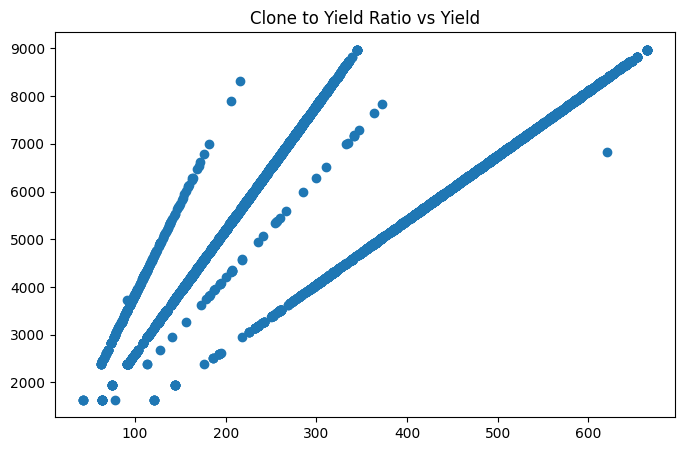

In [253]:
val = df['yield'] / (df['clonesize'] + 1)

plt.figure(figsize=(8, 5))
plt.scatter(x=val, y=df['yield'])
plt.title('Clone to Yield Ratio vs Yield')
plt.show()


In [251]:
from matplotlib import pyplot as plt

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test = PolynomialFeatures(degree=2).fit_transform(X_test)

In [102]:
X_clone=X_train[X_train[:,1] == 12.5]
y_clone=y_train[X_train[:,1] == 12.5]
X_test_clone=X_test[X_test[:,1] == 12.5]
y_test_clone=y_test[X_test[:,1] == 12.5]

In [95]:
reg=MultiVariateRegressor(3)
reg.fit(X_clone, y_clone.values)
mean_absolute_error(y_test_clone, reg.predict(X_test_clone))

273.0854119697957

In [104]:
X_clone2=X_train[X_train[:,1] == 25]
y_clone2=y_train[X_train[:,1] == 25]
X_test_clone2=X_test[X_test[:,1] == 25]
y_test_clone2=y_test[X_test[:,1] == 25]

In [105]:
reg=MultiVariateRegressor(3)
reg.fit(X_clone2, y_clone2.values)
mean_absolute_error(y_test_clone2, reg.predict(X_test_clone2))

268.80634587172494

In [146]:
class SpecialRegressor():
    def __init__(self, degree):
        self.degree = degree
        self.B1 = None
        self.B2 = None
        self.B3 = None

    def fit(self, X, Y):
        X_clone1=np.delete(X[X[:,1] == 12.5], 1, axis=1)
        Y_clone1=Y[X[:,1] == 12.5]
        X_clone2=np.delete(X[X[:,1] == 25], 1, axis=1)
        Y_clone2=Y[X[:,1] == 25]
        reg1=MultiVariateRegressor(3)
        reg2=MultiVariateRegressor(3)
        reg3=MultiVariateRegressor(3)
        reg1.fit(X_clone1, Y_clone1)
        reg2.fit(X_clone2, Y_clone2)
        reg3.fit(X, Y)
        self.B1=reg1.B
        self.B2=reg2.B
        self.B3=reg3.B

    def predict_one(self, X):
        if X[1] == 12.5:
            return np.dot(np.delete(X, 1), self.B1)
        # elif X[1] == 25:
        #     return np.dot(np.delete(X, 1), self.B2)
        return np.dot(X, self.B3)

    def predict(self, X):
        if self.B3.shape[0] != X.shape[1]:
            X=np.hstack((np.ones((X.shape[0], 1)), X))
        return np.array([self.predict_one(x) for x in X])

    def sum_of_squares(self, Y_true, Y_pred):
        return np.sum((Y_true - Y_pred)**2)
        
    def r2_score(self, Y_true, Y_pred):
        # return np.sum((Y_true - Y_pred)**2)
        return 1 - np.sum((Y_true - Y_pred)**2) / np.sum((Y_true - np.mean(Y_true))**2)


In [147]:
regr=SpecialRegressor(3)
regr.fit(X_train, y_train.values)
mean_absolute_error(y_test, regr.predict(X_test))

270.70165589817174

In [151]:
class SpecialRegressor2():
    def __init__(self, degree):
        self.degree = degree
        self.B1 = None
        self.B2 = None
        self.B3 = None

    def fit(self, X, Y):
        X_clone1=np.delete(X[X[:,2] == 0.25], 2, axis=1)
        Y_clone1=Y[X[:,2] == 0.25]
        X_clone2=np.delete(X[X[:,2] == 0.5], 2, axis=1)
        Y_clone2=Y[X[:,2] == 0.5]
        reg1=MultiVariateRegressor(3)
        reg2=MultiVariateRegressor(3)
        reg3=MultiVariateRegressor(3)
        reg1.fit(X_clone1, Y_clone1)
        reg2.fit(X_clone2, Y_clone2)
        reg3.fit(X, Y)
        self.B1=reg1.B
        self.B2=reg2.B
        self.B3=reg3.B

    def predict_one(self, X):
        if X[2] == 0.25:
            return np.dot(np.delete(X, 2), self.B1)
        # elif X[1] == 25:
        #     return np.dot(np.delete(X, 1), self.B2)
        return np.dot(X, self.B3)

    def predict(self, X):
        if self.B3.shape[0] != X.shape[1]:
            X=np.hstack((np.ones((X.shape[0], 1)), X))
        return np.array([self.predict_one(x) for x in X])

    def sum_of_squares(self, Y_true, Y_pred):
        return np.sum((Y_true - Y_pred)**2)
        
    def r2_score(self, Y_true, Y_pred):
        # return np.sum((Y_true - Y_pred)**2)
        return 1 - np.sum((Y_true - Y_pred)**2) / np.sum((Y_true - np.mean(Y_true))**2)


In [153]:
regr=SpecialRegressor2(3)
regr.fit(X_train, y_train.values)
mean_absolute_error(y_test, regr.predict(X_test))

270.1333331150191

In [207]:
for i in range(len(df.columns)):
    if df.iloc[:,i].value_counts().shape[0] < 10:
        print(i)
    # print(df[col].value_counts())

2
3
4
7
8
9
10
11
12
13
14


In [299]:
regressor3=MultiVariateRegressor(13)
regressor3.fit(X_train, y_train)
mean_absolute_error(y_test, regressor3.predict(X_test))

269.6363445038355

In [311]:
regressor3=MultiVariateRegressor(0)
regressor3.fit(X_train[X_train[:,1]==25], y_train[X_train[:,1]==25])
mean_absolute_error(y_test[X_test[:,1]==25], regressor3.predict(X_test[X_test[:,1]==25]))

299.9815150715249

In [334]:
values=[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12]
for value in values:
    regressor3=SpecialRegressor2(value)
    regressor3.fit(X_train, y_train)
    print(mean_absolute_error(y_test, regressor3.predict(X_test)))

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [367]:
class SpecialRegressor_for_3():
    def __init__(self, column=1):
        self.col = column
        self.B1 = None
        self.B2 = None
        self.B3 = None

    def fit(self, X, Y):
        col=self.col
        self.values = [val for val, count in df.iloc[:, self.col+2].value_counts().items() if count > 1000]
        X_clones=[np.delete(X[X[:,col+1] == value], col+1, axis=1) for value in self.values]
        regressors=[MultiVariateRegressor(3) for _ in range(len(self.values))]
        for i, reg in enumerate(regressors):
            reg.fit(X_clones[i], Y[X[:,col+1] == self.values[i]])
        self.B=[reg.B for reg in regressors]
        reg=MultiVariateRegressor(3)
        reg.fit(X, Y)
        self.B.append(reg.B)

    def predict_one(self, X):
        for value in self.values:
            # print(value)
            if value not in [0.25]:
                continue
            if X[self.col+1] == value:
                return np.dot(np.delete(X, self.col+1), self.B[self.values.index(value)])
        return np.dot(X, self.B[-1])

    def predict(self, X):
        if self.B[-1].shape[0] != X.shape[1]:
            X=np.hstack((np.ones((X.shape[0], 1)), X))
        return np.array([self.predict_one(x) for x in X])

    def sum_of_squares(self, Y_true, Y_pred):
        return np.sum((Y_true - Y_pred)**2)
        
    def r2_score(self, Y_true, Y_pred):
        # return np.sum((Y_true - Y_pred)**2)
        return 1 - np.sum((Y_true - Y_pred)**2) / np.sum((Y_true - np.mean(Y_true))**2)


In [368]:
reg=SpecialRegressor_for_3(1)
reg.fit(X_train, y_train)
mean_absolute_error(y_test, reg.predict(X_test))

269.61283673099973

In [372]:
regr=SpecialRegressor_for_3(1)
regr.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))
test_data=pd.read_csv('test.csv')
X=test_data.drop(['id', 'Row#'], axis=1)
X=PolynomialFeatures(degree=2).fit_transform(X)
preds=regr.predict(X)
test_data['yield']=preds
test_data=test_data[['id', 'yield']]
test_data.to_csv('hello.csv', index=False)

In [373]:
orig_observations=pd.read_csv('output.csv')['yield']
new_predictions=pd.read_csv('hello.csv')['yield']
mean_absolute_error(orig_observations, new_predictions)

53.61154126885269

In [366]:
col=1
vals = [val for val, count in df.iloc[:, col+2].value_counts().items() if count > 1000]
reg1=MultiVariateRegressor(col)
reg1.fit(X_train, y_train)
reg2=SpecialRegressor2(col)
reg2.fit(X_train, y_train)
for val in vals:
    X_test_clone=X_test[X_test[:,col+1] == val]
    y_test_clone=y_test[X_test[:,col+1] == val]
    if X_test_clone.shape[0] == 0:
        continue
    print(val, mean_absolute_error(y_test_clone, reg2.predict(X_test_clone))-mean_absolute_error(y_test_clone, reg1.predict(X_test_clone)))

0.5 0.5853650049683665
0.25 -0.047267639710526055


In [196]:
mean_absolute_error(orig_observations, new_observations)

46.004971082166236

In [225]:
from scipy.optimize import minimize

In [226]:
import numpy as np
from scipy.optimize import minimize

# Sample data
X_here = df.drop(['yield', 'id', 'Row#', 'MinOfUpperTRange'], axis=1)  # 100 samples with 2 features
y = df['yield']     # 100 target values
X_here = PolynomialFeatures(degree=2).fit_transform(X_here)

# Define the objective function for MAE
def objective_function(coeffs, X, y):
    predictions = np.dot(X, coeffs)
    mae = np.mean(np.abs(predictions - y))
    return mae

# Initial guess for the coefficients
initial_guess = np.zeros(X_here.shape[1])

# Minimize the objective function
result = minimize(objective_function, initial_guess, args=(X_here, y), method='BFGS')

# Optimized coefficients
optimized_coeffs = result.x
print(f"Optimized coefficients: {optimized_coeffs}")


Optimized coefficients: [ 4.34616628e-01  2.61962743e+00 -1.60570467e+00 -4.67302846e+00
  2.08430309e+01  1.37513072e+01 -2.88393103e+01 -1.74069891e+01
 -2.43755379e+01 -2.17854939e+01 -1.00339468e+01 -1.93536049e+01
  1.00395323e+01  2.15636620e+00  4.44487541e+01 -5.58156212e-01
  2.82061193e+02  1.52394723e-01  1.43106495e+00  1.10518022e+01
  3.02902007e+00  3.18796161e-01 -7.55305521e+00  5.46353951e+01
 -3.35016593e+01  1.99188061e+01 -9.29423434e-01 -1.94390883e+01
  6.25781304e-01 -4.09893128e+01  8.01592887e+01 -1.20886469e+02
 -4.13621997e-02  1.08454451e+00  1.22173905e+00  1.16149359e+00
  1.09125920e+00  6.31505976e+00 -1.25606677e+00 -6.37966824e+00
  1.44856038e+00  8.34927157e-01 -4.16151243e+00  1.90976236e+00
 -2.78692766e+00 -6.15340198e-01 -3.82671305e+00  7.01108492e-01
 -9.85517843e+00  5.01388195e-01 -1.62626253e+01 -2.93483511e-01
 -3.28033311e+00 -1.50529126e+00  2.81078697e-01 -7.13443644e-01
 -5.93992312e+00 -4.16922176e+00 -1.83398899e+00  6.73587928e+00
 

In [227]:
import numpy as np
from scipy.optimize import minimize

# Sample data
X_here = df.drop(['yield', 'id', 'Row#'], axis=1)  # 100 samples with 2 features
y = df['yield']     # 100 target values
X_here = PolynomialFeatures(degree=2).fit_transform(X_here)
X_here_train, X_here_test, y_train, y_test = train_test_split(X_here, y, test_size=0.2, random_state=42)

# Define the objective function for MAE
def objective_function(coeffs, X, y):
    predictions = np.dot(X, coeffs)
    mae = np.mean(np.abs(predictions - y))
    return mae

# Initial guess for the coefficients
initial_guess = np.zeros(X_here_train.shape[1])

# Minimize the objective function
result = minimize(objective_function, initial_guess, args=(X_here_train, y_train), method='BFGS')

# Optimized coefficients
optimized_coeffs = result.x
print(f"Optimized coefficients: {optimized_coeffs}")


Optimized coefficients: [-4.78567823e-01 -2.23406376e+00  4.05467908e+01 -3.49359001e+01
  2.10967743e+02  7.98511374e+01 -3.13437903e+01 -1.88768915e+01
 -2.66653764e+01 -2.20978786e+01 -1.07204801e+01 -2.38533536e+01
  2.62567685e+01  4.29733269e+01  2.91495309e+02  1.50424802e+01
  3.01888522e+02  1.77480684e-01 -8.14406470e+00  1.44286033e+01
  5.36988331e+00 -8.05495260e-01 -2.95168781e+00  1.22827298e+01
 -6.42602655e+00  3.41979246e+00  3.14986869e+00 -4.26072782e+00
  5.64774830e-01 -3.18697946e+01  6.32755862e+01 -1.17114593e+02
 -9.09922327e-02 -1.20880421e+01  1.48032214e+00 -1.31709904e+02
 -2.96689050e+01  4.25934767e+01 -1.91797122e+01 -1.70198403e+01
 -8.58750079e-01  2.52048842e+00 -2.99636711e+01 -1.86810499e+00
 -1.00249389e+01  8.47154363e+00 -1.72620416e+01  1.32308249e+01
 -7.33161565e+01  9.29267879e+00 -4.57624627e+01  1.70434917e+00
 -3.14918654e+00  9.86460298e+00  6.46524745e+00  2.67570372e-01
 -2.89005396e+01 -6.15321350e+00 -7.10217747e-01  3.77364854e+01
 

In [228]:
mean_absolute_error(y_test, np.dot(X_here_test, optimized_coeffs))

267.5906758202281

In [247]:
import numpy as np

# Generate a synthetic dataset
np.random.seed(42)
X = df.drop(['yield', 'id', 'Row#'], axis=1)  # 100 samples, 3 features
# true_coefficients = np.array([1.5, -2.0, 3.0])
y = df['yield']  # adding some noise

# Add a bias term (intercept) to the feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Hyperparameters
learning_rate = 0.01
max_iter = 1000
tolerance = 1e-6

# Initialize coefficients randomly
coefficients = np.random.randn(X.shape[1])

# Function to calculate MAE
def compute_mae(X, y, coefficients):
    predictions = X @ coefficients
    mae = np.mean(np.abs(y - predictions))
    return mae

# Subgradient Descent loop
for iteration in range(max_iter):
    predictions = X @ coefficients
    errors = y - predictions

    # Compute the subgradient of MAE
    subgradient = -np.sign(errors) @ X / len(y)

    # Update coefficients
    coefficients -= learning_rate * subgradient

    # Calculate the new MAE
    mae = compute_mae(X, y, coefficients)

    # Check for convergence
    if np.linalg.norm(learning_rate * subgradient) < tolerance:
        print(f"Converged in {iteration} iterations")
        break

print("Optimal coefficients:", coefficients)
print("Minimum MAE:", mae)

# Making predictions using the optimized coefficients
new_predictions = X @ coefficients


Optimal coefficients: [  1.11633682  -7.37276097   0.59581498   1.77016327   0.19336929
   0.36679615  20.80949682  12.3528182   15.60964201  14.34030538
   6.23062951  10.97609785 -25.61784658  -2.25380554  -0.90988061
  -0.0672634   47.27780567]
Minimum MAE: 940.6585144623907


In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
database=pd.read_csv('test.csv')
database['yield']=pd.read_csv('output.csv')['yield'] 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
X=database.drop(['yield', 'id', 'Row#'], axis=1)
X_train=PolynomialFeatures(degree=4).fit_transform(X)
y=database['yield']
reg=LinearRegression().fit(X_train, y)   

In [9]:
for coef in reg.coef_[:20]:
    print(coef)

-1.6164584113528145e-05
-2.7200851474353018e-05
0.0003829057530694575
2.8450907600695784e-05
-0.00013678949006424814
4.3366076611037966e-05
-8.164906438502231e-05
3.928563036255915e-05
-3.536526438274539e-06
-4.148400352098694e-05
-3.430294674929078e-05
-2.5071341379797035e-06
-3.7168421361193516e-05
-2.8473247335450078e-06
2.7961134907347404e-05
-0.0004085982166954047
-2.0773347641772546e-05
-1.7940597111606397e-05
-5.710563333005897e-05
8.000784263045976e-06


In [ ]:
1, 3, 15